#### Import the required libraries:

In [1]:
#for making HTTP requests (to query a website):
import requests

#for scraping and parsing HTML and XML pages:
from bs4 import BeautifulSoup

#for data manipulation and analysis:
import pandas as pd

#for data visualization:
import matplotlib.pyplot as plt

#### Data Scraping:

In [2]:
# Specify from where we want to scrape the data:
url = 'https://weather.gc.ca/forecast/hourly/on-143_metric_e.html'

In [3]:
# Send an HTTP GET request to the URL:
response = requests.get(url)

In [4]:
# Parse the HTML content with Beautiful Soup:
soup = BeautifulSoup(response.content, 'html.parser')

In [5]:
# Remove unwanted elements (script, style, comments, etc.)
for element in soup(['script', 'style', 'comment']):
    element.extract()

In [6]:
# Print the extracted content to further explore the data, prettify function shows the nested structure of the HTML page:
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <!-- Web Experience Toolkit (WET) / Boîte à outils de l'expérience Web (BOEW)
    wet-boew.github.io/wet-boew/License-en.html / wet-boew.github.io/wet-boew/Licence-fr.html -->
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <meta content="Environment Canada" name="dcterms.creator"/>
  <meta content="eng" name="dcterms.language" title="ISO639-2"/>
  <title>
   Toronto - Hourly Forecast - Environment Canada
  </title>
  <meta content="Meteorology;Weather" data-vmid="dcterms.subject" data-vue-meta="ssr" name="dcterms.subject" title="scheme"/>
  <meta content="2013-04-16" data-vmid="dcterms.issued" data-vue-meta="ssr" name="dcterms.issued" title="W3CDTF"/>
  <meta content="Detailed forecast for the next 24 hours – temperature, weather conditions, likelihood of precipitation and winds" data-vmid="description" data-vue-meta="ssr" name="descrip

In [7]:
#Exploring the page content:

#Extract the visible text:
#text = soup.get_text(separator=' ')

#Finding all the links:
#all_links = soup.find_all('a')
#for link in all_links:
#    print(link.get('href'))

#data to scrape is found in a table, so first check all the tables on a page:
#all_tables = soup.find_all('table')
#print(all_tables)

In [8]:
#extract the table of interest and put it in my_table variable:
#(table details can be found by inspecting particular table on a web page)
my_table = soup.find('table', class_='table table-striped table-hover table-condensed wxo-media')
#my_table

In [9]:
#extract the first column of my_table table, and put it in the list:
First = my_table.find_all('td', headers='header1')
First

[<td class="text-center" headers="header1"> 19:00 </td>,
 <td class="text-center" headers="header1"> 20:00 </td>,
 <td class="text-center" headers="header1"> 21:00 </td>,
 <td class="text-center" headers="header1"> 22:00 </td>,
 <td class="text-center" headers="header1"> 23:00 </td>,
 <td class="text-center" headers="header1"> 00:00 </td>,
 <td class="text-center" headers="header1"> 01:00 </td>,
 <td class="text-center" headers="header1"> 02:00 </td>,
 <td class="text-center" headers="header1"> 03:00 </td>,
 <td class="text-center" headers="header1"> 04:00 </td>,
 <td class="text-center" headers="header1"> 05:00 </td>,
 <td class="text-center" headers="header1"> 06:00 </td>,
 <td class="text-center" headers="header1"> 07:00 </td>,
 <td class="text-center" headers="header1"> 08:00 </td>,
 <td class="text-center" headers="header1"> 09:00 </td>,
 <td class="text-center" headers="header1"> 10:00 </td>,
 <td class="text-center" headers="header1"> 11:00 </td>,
 <td class="text-center" header

In [10]:
#from the above list of cell elements extract only text and append to FirstColumn[] list:
FirstColumn = []
for i in First:
    FirstColumn.append(i.text)
print(FirstColumn)

[' 19:00 ', ' 20:00 ', ' 21:00 ', ' 22:00 ', ' 23:00 ', ' 00:00 ', ' 01:00 ', ' 02:00 ', ' 03:00 ', ' 04:00 ', ' 05:00 ', ' 06:00 ', ' 07:00 ', ' 08:00 ', ' 09:00 ', ' 10:00 ', ' 11:00 ', ' 12:00 ', ' 13:00 ', ' 14:00 ', ' 15:00 ', ' 16:00 ', ' 17:00 ', ' 18:00 ']


In [11]:
#extract the second column of the table:
Second = my_table.find_all('td', headers='header2')

#extract text only and append to list:
SecondColumn =[]
for i in Second:
    SecondColumn.append(i.text)
print(SecondColumn)

[' 21 ', ' 20 ', ' 19 ', ' 19 ', ' 18 ', ' 17 ', ' 15 ', ' 14 ', ' 14 ', ' 13 ', ' 13 ', ' 14 ', ' 15 ', ' 15 ', ' 17 ', ' 18 ', ' 20 ', ' 20 ', ' 21 ', ' 21 ', ' 21 ', ' 22 ', ' 22 ', ' 21 ']


In [12]:
#the third column is composed of several elements, but usable text is enclosed in 'p' (paragraph) tag:
Third = my_table.find_all('p')

#exract text only and append to list:
ThirdColumn = []
for i in Third:
    ThirdColumn.append(i.text)
ThirdColumn

['Mainly cloudy',
 'Mainly cloudy',
 'Mainly cloudy',
 'Mainly cloudy',
 'Mainly cloudy',
 'Partly cloudy',
 'Partly cloudy',
 'A few clouds',
 'Clear',
 'Clear',
 'Clear',
 'Clear',
 'Sunny',
 'Mainly sunny',
 'Sunny',
 'Sunny',
 'Sunny',
 'Sunny',
 'Sunny',
 'Sunny',
 'Sunny',
 'Sunny',
 'Sunny',
 'Sunny']

In [13]:
#extract the fourth column of the table:
Fourth = my_table.find_all('td', headers='header4')

#append only text to list:
FourthColumn = []
for i in Fourth:
    FourthColumn.append(i.text)

In [14]:
#extract the fifth column of the table:
Fifth = my_table.find_all('td', headers='header5')

#append only text to list:
FifthColumn = []
for i in Fifth:
    FifthColumn.append(i.text)
FifthColumn

['E 20 ',
 'E 20 ',
 'E 20 ',
 'VR 5 ',
 'VR 5 ',
 'VR 5 ',
 'VR 5 ',
 'VR 5 ',
 'VR 5 ',
 'VR 5 ',
 'VR 5 ',
 'VR 5 ',
 'VR 5 ',
 'VR 5 ',
 'NE 20 gust 40 ',
 'NE 20 ',
 'E 20 ',
 'E 20 ',
 'E 20 ',
 'E 20 ',
 'E 20 ',
 'E 20 ',
 'E 20 ',
 'E 20 ']

#### Putting everything together in a data frame:

In [15]:
#create a dictionary of above extracted columns:
Weather = {'Date_Time (EDT)' : FirstColumn, 'Temp. (°C)': SecondColumn, 'Weather Conditions' : ThirdColumn, 'Likelihood of precip (%)' : FourthColumn, 'Wind (km/h)' : FifthColumn}

In [16]:
#put everything into a dataframe:
df = pd.DataFrame(Weather)

#convert temperature datatype from string to integer - this will allow proper ordering of values later in a line plot:
df['Temp. (°C)'] = df['Temp. (°C)'].astype(int)

df

,Date_Time (EDT),Temp. (°C),Weather Conditions,Likelihood of precip (%),Wind (km/h)
0,19:00,21,Mainly cloudy,0,E 20
1,20:00,20,Mainly cloudy,0,E 20
2,21:00,19,Mainly cloudy,0,E 20
3,22:00,19,Mainly cloudy,0,VR 5
4,23:00,18,Mainly cloudy,0,VR 5
5,00:00,17,Partly cloudy,0,VR 5
6,01:00,15,Partly cloudy,0,VR 5
7,02:00,14,A few clouds,0,VR 5
8,03:00,14,Clear,0,VR 5
9,04:00,13,Clear,0,VR 5


#### Plotting the line chart:

In [17]:
#extracting the page title and putting it into a variable (this will be used for line chart title):
LineTitle = soup.title.string

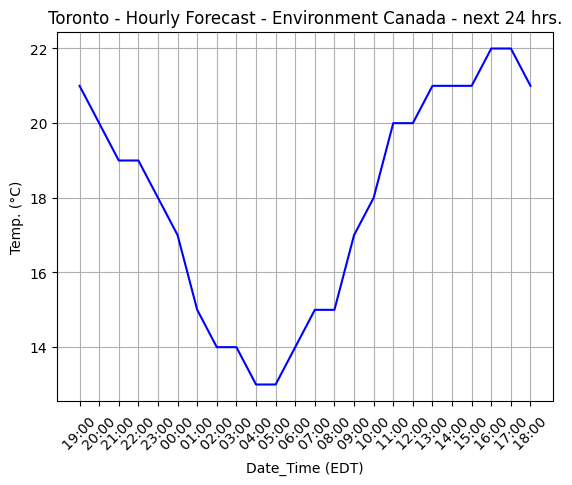

In [18]:
#Plotting the line chart:
plt.plot(df['Date_Time (EDT)'], df['Temp. (°C)'], color='blue')

# Customize the plot
plt.xlabel('Date_Time (EDT)')
plt.ylabel('Temp. (°C)')
plt.title(LineTitle + ' - next 24 hrs.')
plt.xticks(rotation=45)

# Show the plot
plt.grid()
plt.show()

-----------------------------------------------------------------------------------------------------------------------
### Extracting data from another page (to see averages and extremes):

In [19]:
# Specify another page URL:
url2 = 'https://climate.weather.gc.ca/climate_data/almanac_e.html?StationID=51459'

# Send an HTTP GET request to the URL:
response2 = requests.get(url2)

# Parse the HTML content with Beautiful Soup:
soup2 = BeautifulSoup(response2.content, 'html.parser')

# Remove unwanted elements (script, style, comments, etc.)
for element in soup2(['script', 'style', 'comment']):
    element.extract()

#print(soup2.prettify())

In [20]:
#extract the table of interest and put it in my_table2 variable:
my_table2 = soup2.find('table', class_='table table-striped table-hover align-cells-right data-table')

In [21]:
#extract the first column of my_table2 table, and put it in the list:
#first column consist of year names that are stored in <th> tag (header cell tag)
C0 = my_table2.find_all('th', scope='row')

#from the above list of header cells extract only text and append to Column0[] list:
Column0 = []
for i in C0:
    Column0.append(i.text)
print(Column0)

['2023 ', '2022 ', '2021 ', '2020 ', '2019 ']


In [22]:
#extract all data cels and put them in All_DataCells[] list:
All_DataCells = my_table2.find_all('td')

#extract the separate columns of my_table2 table, and put them in the respective lists:

C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
for i in range(0, len(All_DataCells), 9):
    C1.append(All_DataCells[i])
    C2.append(All_DataCells[i+1])
    C3.append(All_DataCells[i+2])
    C4.append(All_DataCells[i+3])
    C5.append(All_DataCells[i+4])
    C6.append(All_DataCells[i+5])

#from the above lists of data cells extract only text and append to respective Column[] lists:
Column1 = []
Column2 = []
Column3 = []
Column4 = []
Column5 = []
Column6 = []

for i in C1:
    Column1.append(i.text)

for i in C2:
    Column2.append(i.text)

for i in C3:
    Column3.append(i.text)

for i in C4:
    Column4.append(i.text)

for i in C5:
    Column5.append(i.text)

for i in C6:
    Column6.append(i.text)
    

#### Puttng everything together in a data frame:

In [23]:
#create a dictionary of above extracted columns:
DailyStats = {'Year' : Column0, 'Max Temp °C': Column1, 'Min Temp °C' : Column2, 'Mean Temp °C' : Column3, 'Total Rain mm' : Column4, 'Total Snow cm' : Column5, 'Total Precip mm' : Column6}

In [24]:
#create a dataframe:
df2 = pd.DataFrame(DailyStats)

In [25]:
#type(df2['Max Temp °C'][2]) -> string
#convert string datatype to float- this will allow proper ordering of values later in a line plot:
df2['Max Temp °C'] = df2['Max Temp °C'].astype(float)
df2['Min Temp °C'] = df2['Min Temp °C'].astype(float)
df2['Mean Temp °C'] = df2['Mean Temp °C'].astype(float)
df2['Total Rain mm'] = df2['Total Rain mm'].astype(float)
df2['Total Snow cm'] = df2['Total Snow cm'].astype(float)
df2['Total Precip mm'] = df2['Total Precip mm'].astype(float)

#sort data by Year - this is how it will be presented in the plot:
df2.sort_values(by='Year', inplace=True)

df2

,Year,Max Temp °C,Min Temp °C,Mean Temp °C,Total Rain mm,Total Snow cm,Total Precip mm
4,2019,25.2,14.9,20.1,0.2,0.0,0.2
3,2020,27.6,12.2,19.9,0.0,0.0,0.0
2,2021,19.3,12.0,15.7,1.8,0.0,1.8
1,2022,16.5,5.0,10.8,0.0,0.0,0.0
0,2023,22.4,11.7,17.1,0.0,0.0,0.0


#### Plotting the chart:

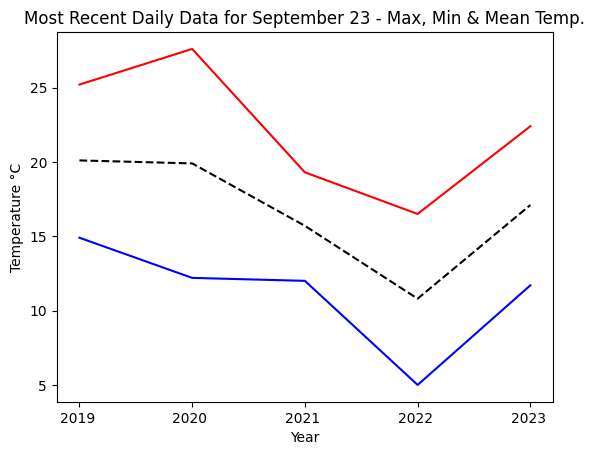

In [26]:
#Plotting the line chart:
plt.plot(df2['Year'], df2['Max Temp °C'], color='red')
plt.plot(df2['Year'], df2['Min Temp °C'], color='blue')
plt.plot(df2['Year'], df2['Mean Temp °C'], color='black', linestyle='dashed')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Temperature °C')
plt.title(my_table2.find('caption').text + ' - Max, Min & Mean Temp.')

# Show the plot
plt.show()

--------------------------------------------------------------------------------------------------------------------------
### Conclusion:
* The graph above is showing how the daily minimum, maximum and average temperature on a given date (as I write it is Sep. 23rd) changed over the years.
* All three lines follow the very similar pattern. It seems that over the last three years the temperatures were falling. It will be interesting to see these fluctuations on other days of the year. Is this maybe a consequence of the pandemic or part of the longer trend?
* For these conclusions to be made we need to have more data points over the longer period, but these kinds of graphs and comparisons can help us in better understanding weather changes.